In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")


In [2]:
df_sales_org=pd.read_excel('Adidas US Sales Datasets.xlsx')
df_sales_org.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


In [3]:
df_sales = df_sales_org.drop('Unnamed: 0',axis=1)
df_sales = df_sales.drop(labels=[0,1,2], axis=0)

df_sales = df_sales.reset_index(drop=True)
df_sales.columns = df_sales.iloc[0]
df_sales = df_sales.drop(labels=[0], axis=0)
df_sales.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
1,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
2,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
3,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
4,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
5,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [4]:
df_sales.describe()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
count,9648,9648,9648,9648,9648,9648,9648,9648.0,9648,9648.0,9648.0,9648.00,9648
unique,6,4,724,5,50,52,6,146.0,361,3512.0,6510.0,127.00,3
top,Foot Locker,1185732,2021-01-17 00:00:00,West,California,Portland,Men's Street Footwear,50.0,225,100000.0,21000.0,0.35,Online
freq,2637,5265,77,2448,432,360,1610,557.0,207,52.0,34.0,1229.00,4889


In [5]:
df_sales.isna().sum()

0
Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [6]:
#df_sales = df_sales[(df_sales["Product"]=="Men's Athletic Footwear") | (df_sales["Product"]=="Women's Athletic Footwear")]

In [7]:
df_sales['Month'] = pd.to_datetime(df_sales['Invoice Date']).dt.month
df_sales['Year'] = pd.to_datetime(df_sales['Invoice Date']).dt.year

In [8]:
df_sales["Retailer_ID_City"] = df_sales["Retailer"].astype(str) + " |-| " + df_sales["Retailer ID"].astype(str) \
    + " |-| " + df_sales["City"]

df_sales.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Month,Year,Retailer_ID_City
1,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store,1,2020,Foot Locker |-| 1185732 |-| New York
2,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store,1,2020,Foot Locker |-| 1185732 |-| New York
3,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store,1,2020,Foot Locker |-| 1185732 |-| New York
4,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store,1,2020,Foot Locker |-| 1185732 |-| New York
5,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store,1,2020,Foot Locker |-| 1185732 |-| New York


In [9]:
df_sales_bkp = df_sales.__deepcopy__
df_sales = df_sales.groupby(["Retailer_ID_City","Retailer","Retailer ID","City","Sales Method","Price per Unit","Month","Year"])["Total Sales"].sum().reset_index()

#df_sales = df_sales[["Retailer_ID_City","Retailer","Retailer ID","City","Sales Method","Price per Unit","Month","Year","Total Sales"]]


In [10]:
df_sales.head()

,Retailer_ID_City,Retailer,Retailer ID,City,Sales Method,Price per Unit,Month,Year,Total Sales
0,Amazon |-| 1185732 |-| Anchorage,Amazon,1185732,Anchorage,Online,41.0,3,2021,2829
1,Amazon |-| 1185732 |-| Anchorage,Amazon,1185732,Anchorage,Online,43.0,2,2021,3311
2,Amazon |-| 1185732 |-| Anchorage,Amazon,1185732,Anchorage,Online,44.0,4,2021,2684
3,Amazon |-| 1185732 |-| Anchorage,Amazon,1185732,Anchorage,Online,47.0,4,2021,2068
4,Amazon |-| 1185732 |-| Anchorage,Amazon,1185732,Anchorage,Online,49.0,2,2021,2254


In [11]:
df_sales = df_sales[(df_sales["Price per Unit"]>0) & (df_sales["Total Sales"]>0) ]

df_sales["Log_Price_Per_Unit"]=np.log(df_sales["Price per Unit"].astype(float))
df_sales["Log_Sales"]=np.log(df_sales["Total Sales"].astype(float))

In [12]:
df_sales_cleansed= pd.get_dummies(df_sales[["Retailer_ID_City","Retailer","City","Sales Method","Month","Year","Price per Unit","Log_Price_Per_Unit","Total Sales","Log_Sales"]]\
                                  , columns=["Sales Method","Year"])

df_sales_cleansed.head()

,Retailer_ID_City,Retailer,City,Month,Price per Unit,Log_Price_Per_Unit,Total Sales,Log_Sales,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,Year_2020,Year_2021
0,Amazon |-| 1185732 |-| Anchorage,Amazon,Anchorage,3,41.0,3.713572,2829,7.947679,0,1,0,0,1
1,Amazon |-| 1185732 |-| Anchorage,Amazon,Anchorage,2,43.0,3.761200,3311,8.105006,0,1,0,0,1
2,Amazon |-| 1185732 |-| Anchorage,Amazon,Anchorage,4,44.0,3.784190,2684,7.895063,0,1,0,0,1
3,Amazon |-| 1185732 |-| Anchorage,Amazon,Anchorage,4,47.0,3.850148,2068,7.634337,0,1,0,0,1
4,Amazon |-| 1185732 |-| Anchorage,Amazon,Anchorage,2,49.0,3.891820,2254,7.720462,0,1,0,0,1


In [13]:
df_sales_cleansed["Log_Price_Year"] = df_sales_cleansed["Log_Price_Per_Unit"]*df_sales_cleansed["Year_2021"]

In [14]:
import itertools
import numpy as np
from sklearn.linear_model import LinearRegression

df_pool_results_init=None
intercept_details = []

for unique_retailer_detail in df_sales_cleansed["Retailer_ID_City"].unique():

    df_sales_analysis = df_sales_cleansed[(df_sales_cleansed["Retailer_ID_City"]==unique_retailer_detail)]

    df_sales_analysis = df_sales_analysis[(df_sales_analysis["Price per Unit"]>0) & (df_sales_analysis["Total Sales"]>0) ]

    column_list = [x for x in df_sales_analysis.columns if x not in ["Retailer","City",'Log_Sales','Total Sales','Price per Unit','Retailer_ID_City',"Month","Log_Price_Year"]]

    X= df_sales_analysis[column_list].values
    Y= df_sales_analysis["Log_Sales"].values

    Y = Y.reshape(-1, 1)

    model = LinearRegression()

    model.fit(X, Y)

    slope = model.coef_
    intercept_val = model.intercept_


    try:
        df_pool_results_append = pd.DataFrame(slope)
        df_pool_results_append.columns = [column_list]
        df_pool_results_init = df_pool_results_init.append(df_pool_results_append)
    except:
        df_pool_results_init = pd.DataFrame(slope)
        df_pool_results_init.columns = [column_list]

    intercept_details.append(intercept_val)
        

In [15]:
df_pool_results_init.index = pd.RangeIndex(start=0, stop=len(df_pool_results_init), step=1)

pool_results = np.empty(df_pool_results_init.shape)

for i in range(len(df_pool_results_init)):
    for j in range(len(df_pool_results_init.iloc[i])):
        pool_results[i][j] = df_pool_results_init.iloc[i][j]

df_pool_results = pd.DataFrame(pool_results)
df_pool_results.columns = column_list

df_pool_results.head()

,Log_Price_Per_Unit,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,Year_2020,Year_2021
0,1.854108,0.000000,-1.877280,1.877280,0.0,0.0
1,8.776554,0.000000,-1.235043,1.235043,0.0,0.0
2,1.228887,2.544986,-1.377462,-1.167525,0.0,0.0
3,1.689973,2.418403,-1.407632,-1.010771,0.0,0.0
4,1.893386,0.000000,0.000000,0.000000,0.0,0.0


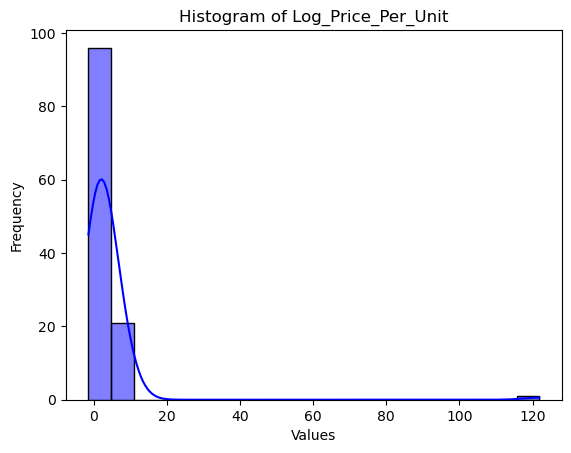

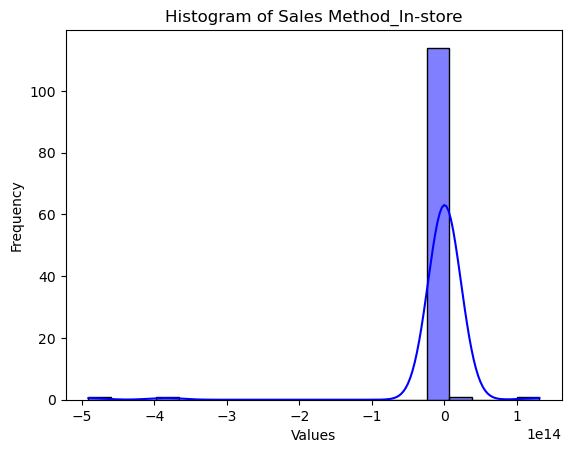

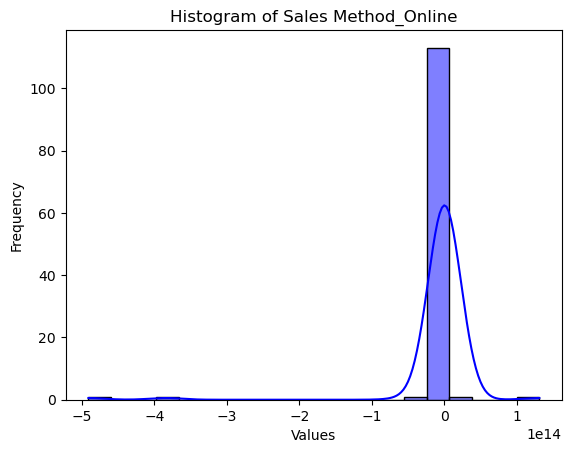

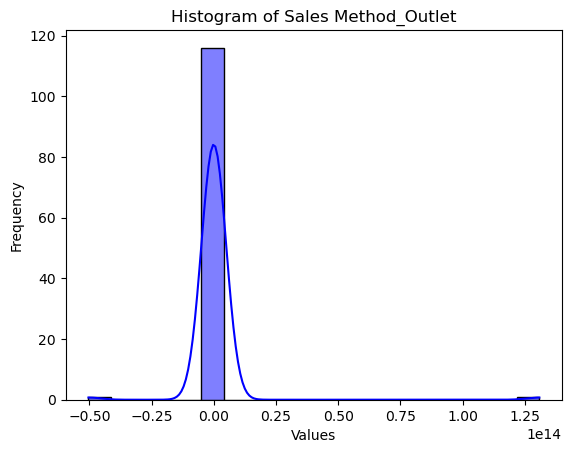

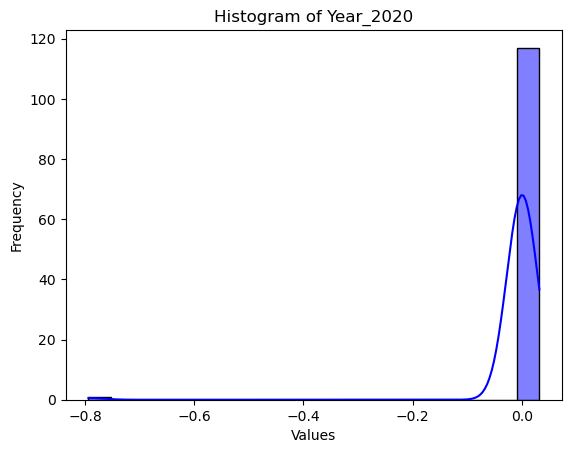

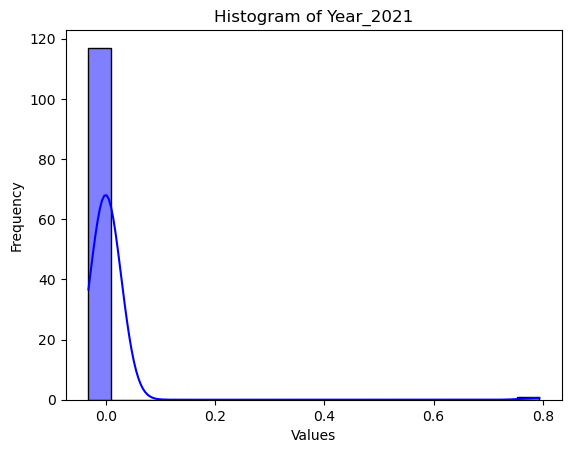

In [16]:
pool_results_normalized_column_list = [x for x in df_pool_results.columns if '_normalized' not in x]

for column in pool_results_normalized_column_list:
    sns.histplot(df_pool_results[column], bins=20, kde=True, color='blue')

    # Add labels and a title
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + column)

    # Show the histogram
    plt.show()

In [17]:
#df_pool_results_bkp = df_pool_results.__deepcopy__()

df_pool_results_exclude_1 = df_pool_results[df_pool_results["Log_Price_Per_Unit"]>110]
df_pool_results_exclude_2 = df_pool_results[df_pool_results["Sales Method_In-store"]< -1 * (2.71828 ** 14)]
df_pool_results_exclude_3 = df_pool_results[df_pool_results["Sales Method_In-store"]>  1 * (2.71828 ** 14)]

In [18]:
df_pool_results_exclude_1.head()

,Log_Price_Per_Unit,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,Year_2020,Year_2021
116,121.846945,-1.421085e-14,-23.631294,23.631294,0.0,0.0


In [19]:
df_pool_results_exclude_2.head()

,Log_Price_Per_Unit,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,Year_2020,Year_2021
12,0.420687,-3.839141e+14,-3.839141e+14,0.000000e+00,0.0,0.0
71,1.132805,-4.909001e+14,-4.909001e+14,0.000000e+00,0.0,0.0
81,5.102633,-9.195462e+11,-5.038189e+13,-5.038189e+13,0.0,0.0


In [20]:
df_pool_results_exclude_3.head()

,Log_Price_Per_Unit,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,Year_2020,Year_2021
69,1.692861,1.308957e+14,1.308957e+14,1.308957e+14,0.0,0.0
103,2.370786,1.877646e+13,1.877646e+13,0.000000e+00,0.0,0.0


In [21]:
df_pool_results = df_pool_results[df_pool_results["Log_Price_Per_Unit"]<=110]
df_pool_results = df_pool_results[df_pool_results["Sales Method_In-store"]>= -1 * (2.71828 ** 14)]
df_pool_results = df_pool_results[df_pool_results["Sales Method_In-store"]<=  1 * (2.71828 ** 14)]

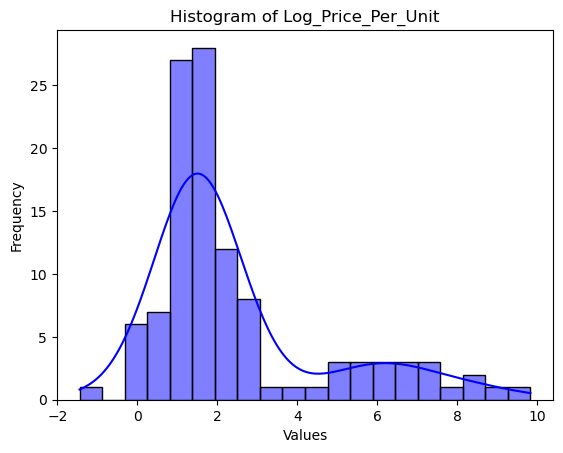

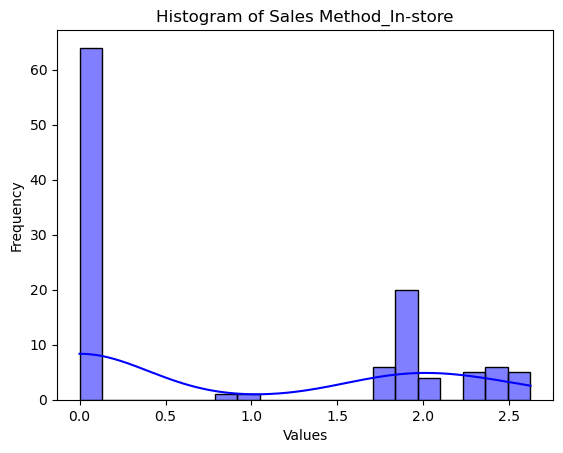

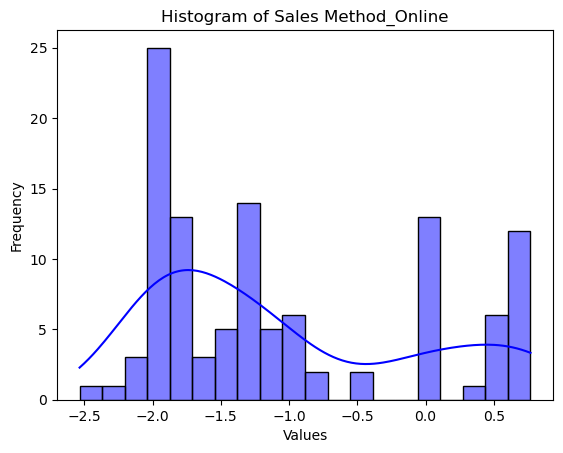

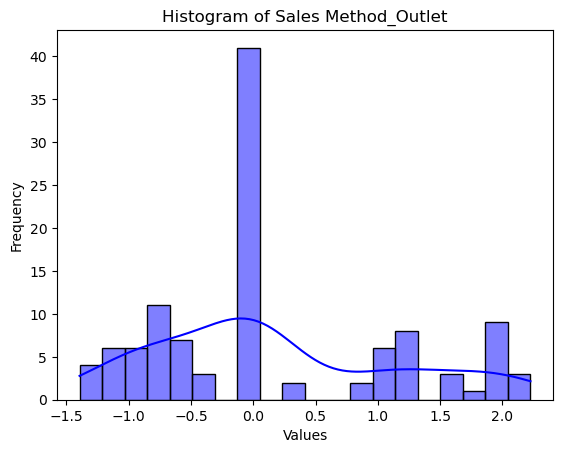

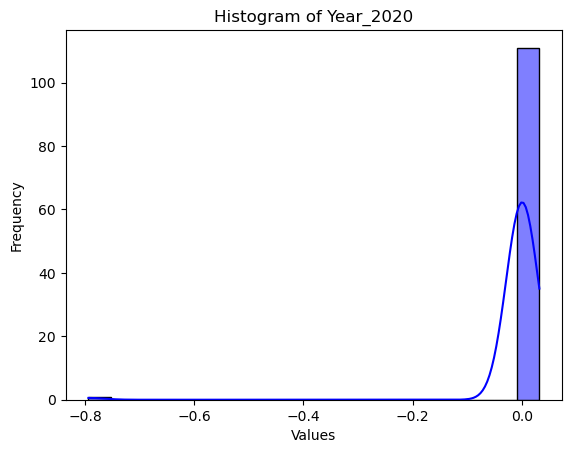

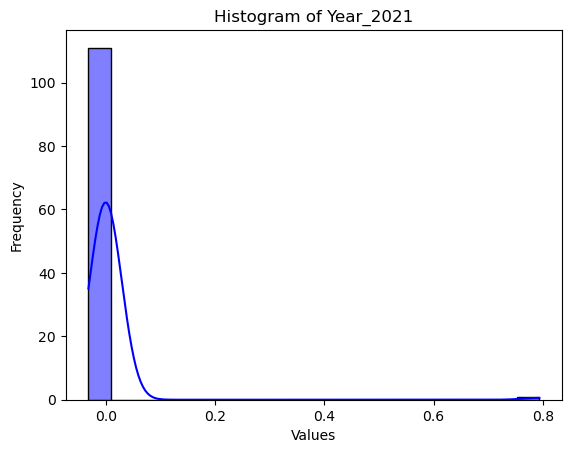

In [22]:
pool_results_normalized_column_list = [x for x in df_pool_results.columns if '_normalized' not in x ]#and "Year" not in x and "Method"not in x]


for column in pool_results_normalized_column_list:
    sns.histplot(df_pool_results[column], bins=20, kde=True, color='blue')

    # Add labels and a title
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + column)

    # Show the histogram
    plt.show()

In [23]:
def normalize_column(column):
    min_val = column.min()
    max_val = column.max()
    if max_val - min_val>1:
        normalized = (column - min_val) / (max_val - min_val)
    else:
        normalized = column
    return normalized

In [24]:
pool_results_non_normalized_column_list = [x for x in df_pool_results.columns if '_normalized' not in x]

for column_name in pool_results_non_normalized_column_list:
    df_pool_results[column_name+'_normalized'] = normalize_column(df_pool_results[column_name])

In [25]:
'''
analysis_index = df_sales_cleansed["Retailer_ID_City"].unique()[115]

df_sales_cleansed[(df_sales_cleansed["Retailer_ID_City"]==analysis_index)]
'''

'\nanalysis_index = df_sales_cleansed["Retailer_ID_City"].unique()[115]\n\ndf_sales_cleansed[(df_sales_cleansed["Retailer_ID_City"]==analysis_index)]\n'

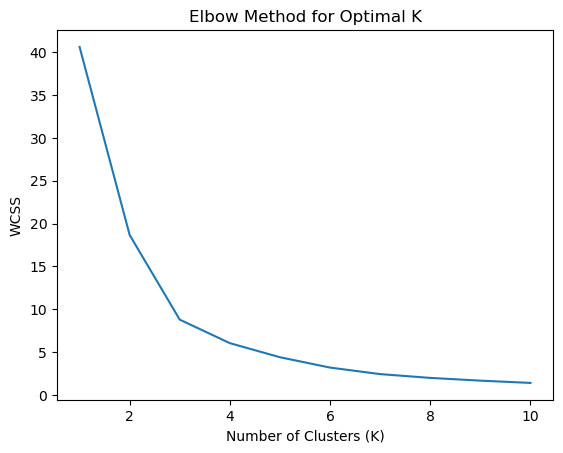

In [26]:
from sklearn.cluster import KMeans

pool_results_normalized_column_list = [x for x in df_pool_results.columns if '_normalized' in x and x!='Log_Price_Year']

data = df_pool_results[pool_results_normalized_column_list].dropna().values
#data = data.reshape(-1, 1)

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()


In [27]:
pool_results_not_normalized_column_list = [x for x in df_pool_results.columns if '_normalized' not in x and x!='Log_Price_Year']

data = df_pool_results[pool_results_not_normalized_column_list].dropna().values

k = 3  # Example: Number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data)

cluster_labels = kmeans.labels_

cluster_centers = kmeans.cluster_centers_

print("Cluster Centers:", cluster_centers)

from collections import Counter
cluster_sizes = dict(Counter(cluster_labels))

Cluster Centers: [[ 1.38477497e+00  2.06279701e+00 -1.68707804e+00 -3.75718966e-01
  -4.33680869e-18 -7.80625564e-18]
 [ 6.62870574e+00  1.69572010e-01 -1.06376818e+00  8.94196173e-01
  -3.62786851e-02  3.62786851e-02]
 [ 1.59804299e+00  1.71236839e-02 -3.66151609e-01  3.49027925e-01
  -5.20417043e-18 -7.80625564e-18]]


In [28]:
cluster_centers_reformed = np.empty(cluster_centers.shape)

for i in range(len(cluster_centers)):    
    for j in range(len(cluster_centers[0])):
        column = df_pool_results[pool_results_not_normalized_column_list[j]]
        min_val = column.min()
        max_val = column.max()
        cluster_centers_reformed[i][j] = cluster_centers[i][j] * (max_val - min_val) + min_val

cluster_centers_reformed_df = pd.DataFrame(cluster_centers_reformed)
cluster_centers_reformed_df.columns=pool_results_not_normalized_column_list
cluster_centers_reformed_df["cluster_size"] = cluster_sizes

cluster_centers_reformed_df.head()

,Log_Price_Per_Unit,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,Year_2020,Year_2021,cluster_size
0,14.167988,5.410891,-8.109021,-2.754033,-0.793471,-0.031619,45
1,73.297664,0.444802,-6.049615,1.842837,-0.823404,-0.001686,21
2,16.572762,0.044917,-3.744700,-0.130576,-0.793471,-0.031619,46


In [29]:
arr_unique_index = df_sales_cleansed["Retailer_ID_City"].unique()

indices_to_exclude = np.hstack((df_pool_results_exclude_1.index, df_pool_results_exclude_2.index, df_pool_results_exclude_3.index))

# Create a boolean mask to identify elements to exclude
mask = np.ones_like(arr_unique_index, dtype=bool)
mask[indices_to_exclude] = False

# Get the elements except the ones with specified indices
elements_except_excluded = arr_unique_index[mask]

In [30]:
df_pool_results_analysis = df_pool_results.__deepcopy__()

df_pool_results_analysis["Retailer_ID_City"]=elements_except_excluded
df_pool_results_analysis["Cluster"]=cluster_labels

df_pool_results_analysis.head(3)

,Log_Price_Per_Unit,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,Year_2020,Year_2021,Log_Price_Per_Unit_normalized,Sales Method_In-store_normalized,Sales Method_Online_normalized,Sales Method_Outlet_normalized,Year_2020_normalized,Year_2021_normalized,Retailer_ID_City,Cluster
0,1.854108,0.000000,-1.877280,1.877280,0.0,0.0,0.292715,2.539506e-16,0.199051,0.903711,0.0,0.0,Amazon |-| 1185732 |-| Anchorage,2
1,8.776554,0.000000,-1.235043,1.235043,0.0,0.0,0.906634,2.539506e-16,0.393433,0.726289,0.0,0.0,Amazon |-| 1185732 |-| Birmingham,1
2,1.228887,2.544986,-1.377462,-1.167525,0.0,0.0,0.237267,9.702264e-01,0.350328,0.062564,0.0,0.0,Amazon |-| 1185732 |-| Boston,0


In [31]:
df_sales[df_sales["Retailer_ID_City"]=="Amazon |-| 1185732 |-| Anchorage"].head()

,Retailer_ID_City,Retailer,Retailer ID,City,Sales Method,Price per Unit,Month,Year,Total Sales,Log_Price_Per_Unit,Log_Sales
0,Amazon |-| 1185732 |-| Anchorage,Amazon,1185732,Anchorage,Online,41.0,3,2021,2829,3.713572,7.947679
1,Amazon |-| 1185732 |-| Anchorage,Amazon,1185732,Anchorage,Online,43.0,2,2021,3311,3.761200,8.105006
2,Amazon |-| 1185732 |-| Anchorage,Amazon,1185732,Anchorage,Online,44.0,4,2021,2684,3.784190,7.895063
3,Amazon |-| 1185732 |-| Anchorage,Amazon,1185732,Anchorage,Online,47.0,4,2021,2068,3.850148,7.634337
4,Amazon |-| 1185732 |-| Anchorage,Amazon,1185732,Anchorage,Online,49.0,2,2021,2254,3.891820,7.720462


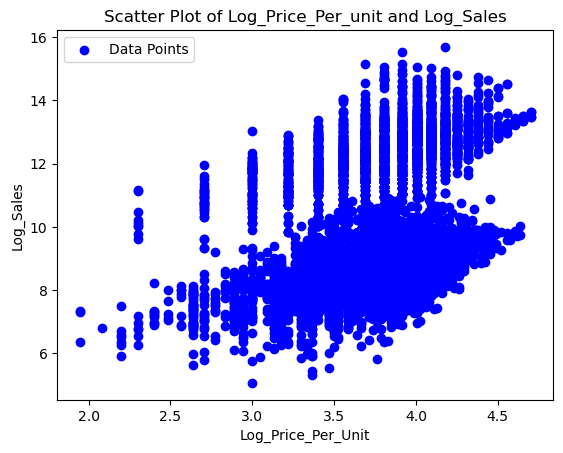

In [32]:
x = df_sales_cleansed['Log_Price_Per_Unit']
y = df_sales_cleansed['Log_Sales']

# Create a scatter plot
plt.scatter(x, y, c='blue', label='Data Points')

# Add labels and a title
plt.xlabel('Log_Price_Per_Unit')
plt.ylabel('Log_Sales')
plt.title('Scatter Plot of Log_Price_Per_unit and Log_Sales')

# Add a legend (optional)
plt.legend()

In [33]:
'''
def model(retailer_detail, Price, Sales_obs=None):
    μ_α = numpyro.sample("μ_α", dist.Normal(5.0, 5.0))
    σ_α = numpyro.sample("σ_α", dist.HalfNormal(20.0))
    μ_β = numpyro.sample("μ_β", dist.Normal(-10.0, 5.0))
    σ_β = numpyro.sample("σ_β", dist.HalfNormal(15.0))

    n_retailer_detail = len(np.unique(retailer_detail))

    with numpyro.plate("plate_i", n_retailer_detail):
        α = numpyro.sample("α", dist.Normal(μ_α, σ_α))
        β = numpyro.sample("β", dist.Normal(μ_β, σ_β))

    σ = numpyro.sample("σ", dist.HalfNormal(50.0))
    Sales_est = α[retailer_detail] + β[retailer_detail] * Price

    with numpyro.plate("data", len(retailer_detail)):
        numpyro.sample("obs", dist.Normal(Sales_est, σ), obs=Sales_obs)
'''

'\ndef model(retailer_detail, Price, Sales_obs=None):\n    μ_α = numpyro.sample("μ_α", dist.Normal(5.0, 5.0))\n    σ_α = numpyro.sample("σ_α", dist.HalfNormal(20.0))\n    μ_β = numpyro.sample("μ_β", dist.Normal(-10.0, 5.0))\n    σ_β = numpyro.sample("σ_β", dist.HalfNormal(15.0))\n\n    n_retailer_detail = len(np.unique(retailer_detail))\n\n    with numpyro.plate("plate_i", n_retailer_detail):\n        α = numpyro.sample("α", dist.Normal(μ_α, σ_α))\n        β = numpyro.sample("β", dist.Normal(μ_β, σ_β))\n\n    σ = numpyro.sample("σ", dist.HalfNormal(50.0))\n    Sales_est = α[retailer_detail] + β[retailer_detail] * Price\n\n    with numpyro.plate("data", len(retailer_detail)):\n        numpyro.sample("obs", dist.Normal(Sales_est, σ), obs=Sales_obs)\n'

In [34]:
for i in range(len(intercept_details)):
    intercept_details[i]= intercept_details[i][0]

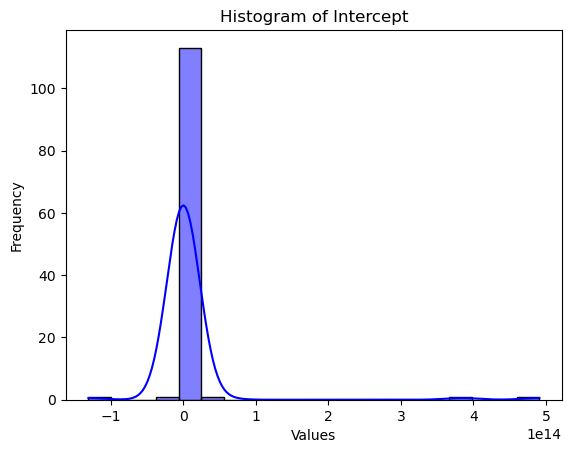

In [35]:
sns.histplot(intercept_details, bins=20, kde=True, color='blue')

# Add labels and a title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Intercept')

# Show the histogram
plt.show()

In [36]:
intercept_details_cleansed = [ item for item in intercept_details if item <= (2.71828 ** 14) and item >= -1 * (2.71828 ** 14) ]

np.mean(intercept_details_cleansed)

-2.7044592241201393

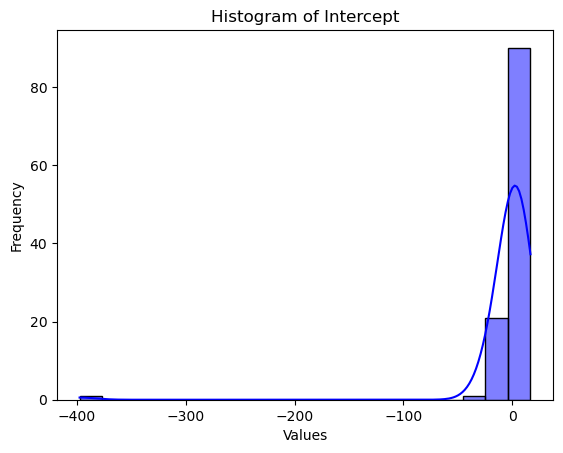

In [37]:
sns.histplot(intercept_details_cleansed, bins=20, kde=True, color='blue')

# Add labels and a title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Intercept')

# Show the histogram
plt.show()

In [38]:
import numpyro
from numpyro.infer import MCMC, NUTS, Predictive
import numpyro.distributions as dist
from jax import random

assert numpyro.__version__.startswith("0.13.2")

In [39]:
'''
def model(retailer_detail, Price, Sales_obs=None):
    μ_α = numpyro.sample("μ_α", dist.Normal(0.0, 5000.0))
    σ_α = numpyro.sample("σ_α", dist.HalfNormal(100.0))
    μ_β = numpyro.sample("μ_β", dist.Normal(0.0, 5000.0))
    σ_β = numpyro.sample("σ_β", dist.HalfNormal(3.0))

    n_retailer_detail = len(np.unique(retailer_detail))

    with numpyro.plate("plate_i", n_retailer_detail):
        α = numpyro.sample("α", dist.Normal(0, 1000))
        β = numpyro.sample("β", dist.Normal(0, 1000))

    σ = numpyro.sample("σ", dist.HalfNormal(1000.0))
    Sales_est = α[retailer_detail] + β[retailer_detail] * Price

    with numpyro.plate("data", len(retailer_detail)):
        numpyro.sample("obs", dist.Normal(Sales_est, σ), obs=Sales_obs)
'''

'\ndef model(retailer_detail, Price, Sales_obs=None):\n    μ_α = numpyro.sample("μ_α", dist.Normal(0.0, 5000.0))\n    σ_α = numpyro.sample("σ_α", dist.HalfNormal(100.0))\n    μ_β = numpyro.sample("μ_β", dist.Normal(0.0, 5000.0))\n    σ_β = numpyro.sample("σ_β", dist.HalfNormal(3.0))\n\n    n_retailer_detail = len(np.unique(retailer_detail))\n\n    with numpyro.plate("plate_i", n_retailer_detail):\n        α = numpyro.sample("α", dist.Normal(0, 1000))\n        β = numpyro.sample("β", dist.Normal(0, 1000))\n\n    σ = numpyro.sample("σ", dist.HalfNormal(1000.0))\n    Sales_est = α[retailer_detail] + β[retailer_detail] * Price\n\n    with numpyro.plate("data", len(retailer_detail)):\n        numpyro.sample("obs", dist.Normal(Sales_est, σ), obs=Sales_obs)\n'

In [40]:
def model(retailer_detail, Price, Sales_Method_In_store, Sales_Method_Online, Sales_Method_Outlet, Year_2020, Year_2021, Sales_obs=None):

    n_retailer_detail = len(np.unique(retailer_detail))

    with numpyro.plate("plate_i", n_retailer_detail):
        α = numpyro.sample("α", dist.Normal(-2.7, 100))
        β1 = numpyro.sample("β1", dist.Normal(20, 80))
        β2 = numpyro.sample("β2", dist.Normal(0, 10))
        β3 = numpyro.sample("β3", dist.Normal(0, 10))
        β4 = numpyro.sample("β4", dist.Normal(0, 10))
        β5 = numpyro.sample("β5", dist.Normal(0.5, 5))
        β6 = numpyro.sample("β6", dist.Normal(0.5, 5))


    σ = numpyro.sample("σ", dist.HalfNormal(1000.0))
    Sales_est = α[retailer_detail] + β1[retailer_detail] * Price + β2[retailer_detail] * Sales_Method_In_store \
        + β3[retailer_detail] * Sales_Method_Online + β4[retailer_detail] * Sales_Method_Outlet\
         + β5[retailer_detail] * Year_2020 + β6[retailer_detail] * Year_2021

    with numpyro.plate("data", len(retailer_detail)):
        numpyro.sample("obs", dist.Normal(Sales_est, σ), obs=Sales_obs)

In [41]:
from sklearn.preprocessing import LabelEncoder

retailer_encoder = LabelEncoder()

analysis_column_name = [x for x in df_sales_cleansed.columns if x not in ['Retailer', 'City', 'Month', 'Price per Unit' , 'Total Sales']]

df_sales_analysis = df_sales_cleansed[analysis_column_name]

df_sales_analysis = df_sales_analysis[(df_sales_analysis["Log_Price_Per_Unit"]>0) & (df_sales_analysis["Log_Sales"]>0) ]

df_sales_analysis["retailer_city_code"] = retailer_encoder.fit_transform(df_sales_analysis["Retailer_ID_City"].values)

df_sales_analysis

Sales_obs = df_sales_analysis["Log_Sales"].values
Price = df_sales_analysis["Log_Price_Per_Unit"].values
retailer_code = df_sales_analysis["retailer_city_code"].values
Sales_Method_In_store = df_sales_analysis["Sales Method_In-store"].values
Sales_Method_Online = df_sales_analysis["Sales Method_Online"].values
Sales_Method_Outlet = df_sales_analysis["Sales Method_Outlet"].values
Year_2020 = df_sales_analysis["Year_2020"].values
Year_2021 = df_sales_analysis["Year_2021"].values

In [42]:
nuts_kernel = NUTS(model)

mcmc = MCMC(nuts_kernel, num_samples=2000, num_warmup=2000)
rng_key = random.PRNGKey(0)
mcmc.run(rng_key, retailer_code, Price,  Sales_Method_In_store, Sales_Method_Online, Sales_Method_Outlet, Year_2020, Year_2021,  Sales_obs=Sales_obs)

posterior_samples = mcmc.get_samples()

sample: 100%|██████████| 4000/4000 [11:41<00:00,  5.71it/s, 1023 steps of size 4.47e-03. acc. prob=0.88]


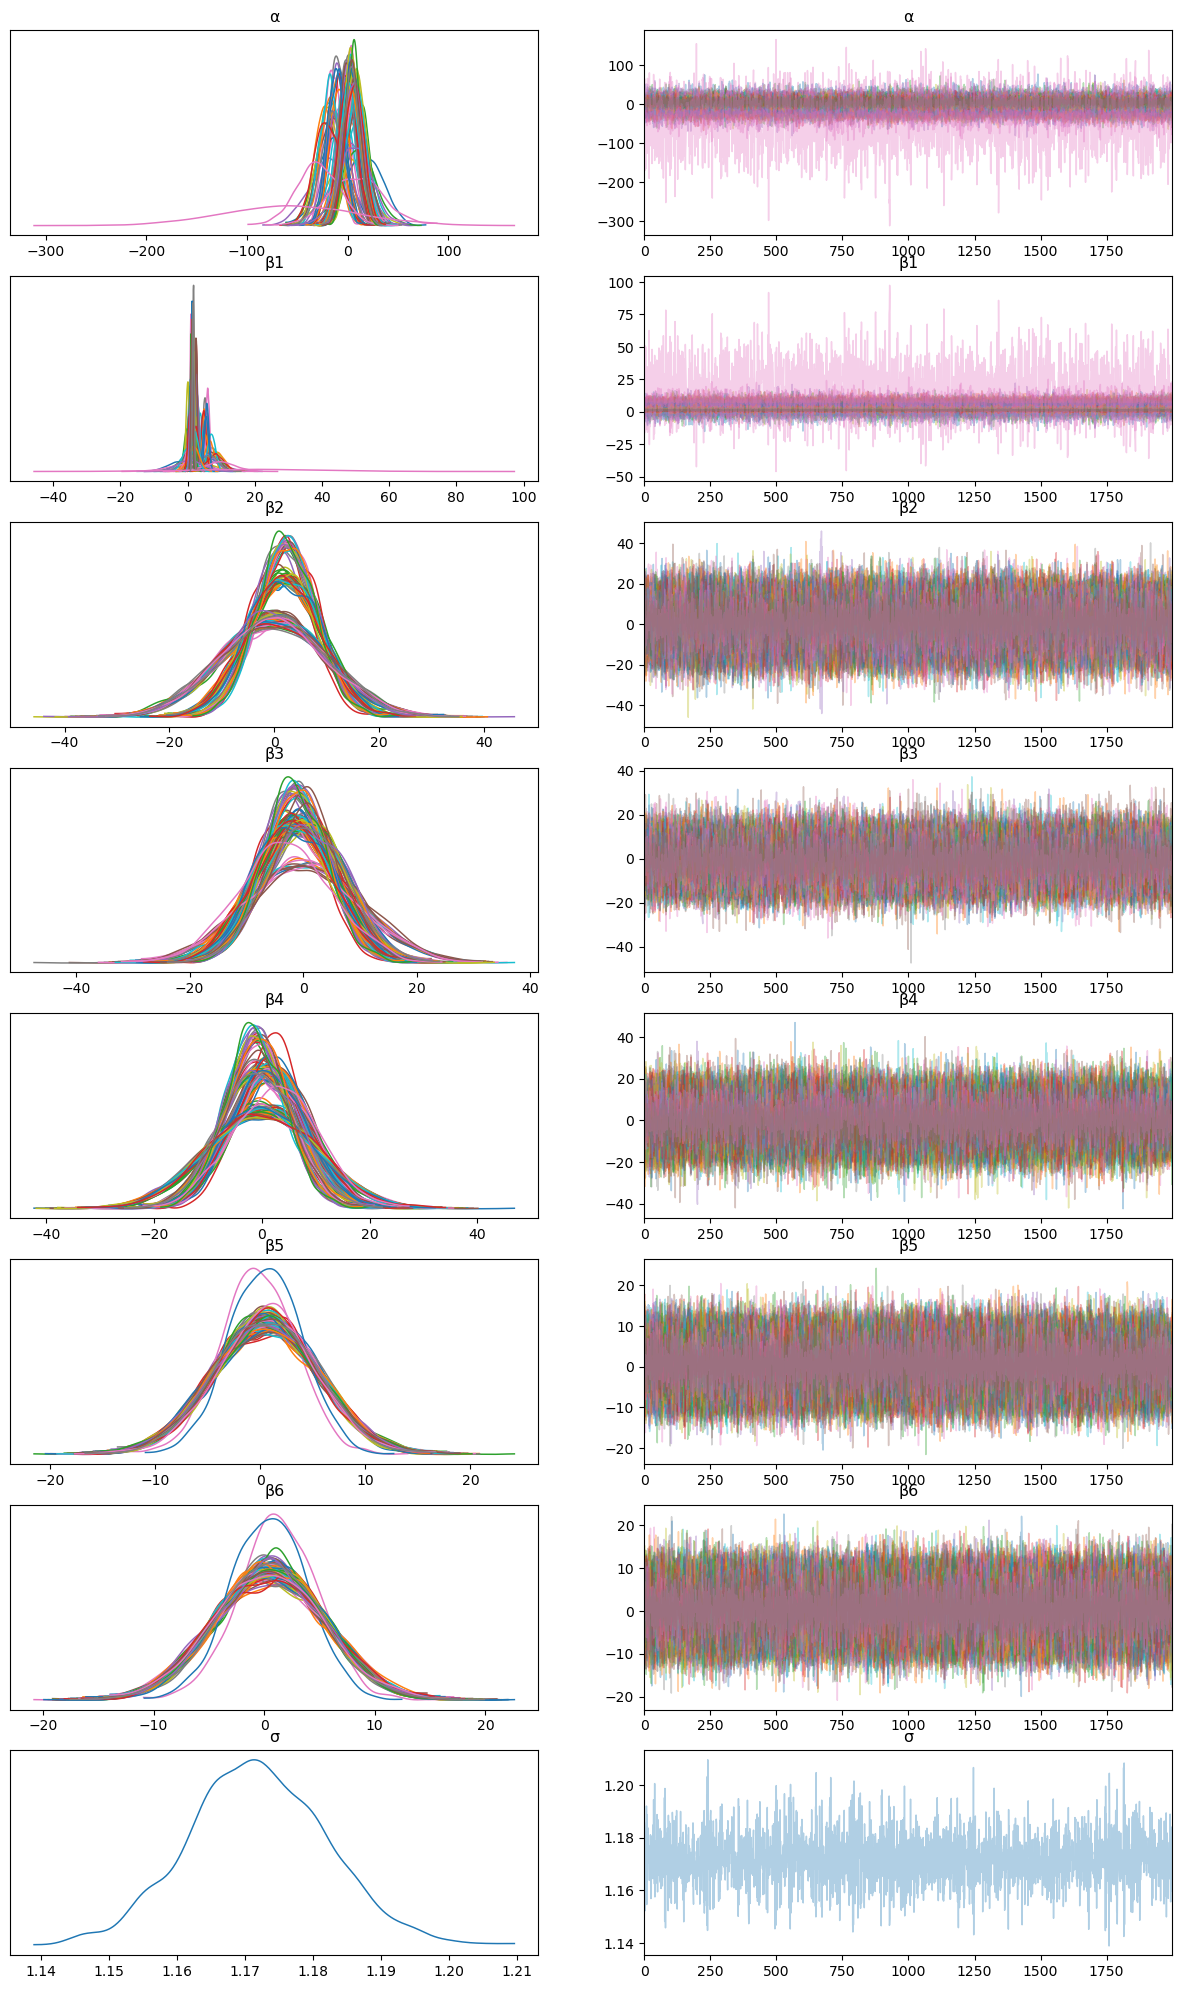

In [43]:
import arviz as az

data = az.from_numpyro(mcmc)
az.plot_trace(data, compact=True, figsize=(15, 25));

In [44]:
'''
def create_prediction_template(unique_retailer_df, price_series):
    unique_retailer_df["_temp"] = True
    Price = pd.DataFrame(price_series, columns=["Log_Price_Per_Unit"])
    Price["_temp"] = True
    return unique_retailer_df.merge(Price, on="_temp").drop(["_temp"], axis=1)
'''

'\ndef create_prediction_template(unique_retailer_df, price_series):\n    unique_retailer_df["_temp"] = True\n    Price = pd.DataFrame(price_series, columns=["Log_Price_Per_Unit"])\n    Price["_temp"] = True\n    return unique_retailer_df.merge(Price, on="_temp").drop(["_temp"], axis=1)\n'

In [45]:
'''
sales = df_sales_analysis[["Retailer_ID_City", "retailer_city_code"]].drop_duplicates()
predict_price = pd.Series(df_sales_analysis["Log_Price_Per_Unit"].sort_values())
pred_template = create_prediction_template(sales, predict_price)
'''

'\nsales = df_sales_analysis[["Retailer_ID_City", "retailer_city_code"]].drop_duplicates()\npredict_price = pd.Series(df_sales_analysis["Log_Price_Per_Unit"].sort_values())\npred_template = create_prediction_template(sales, predict_price)\n'

In [46]:
pred_template= df_sales_analysis[["Retailer_ID_City", "retailer_city_code","Log_Price_Per_Unit",\
    "Sales Method_In-store","Sales Method_Online","Sales Method_Outlet","Year_2020","Year_2021"]].drop_duplicates()

In [47]:
retailer_code = pred_template["retailer_city_code"].values
Price = pred_template["Log_Price_Per_Unit"].values
Sales_Method_In_store = pred_template["Sales Method_In-store"].values
Sales_Method_Online = pred_template["Sales Method_Online"].values
Sales_Method_Outlet = pred_template["Sales Method_Outlet"].values
Year_2020 = pred_template["Year_2020"].values
Year_2021 = pred_template["Year_2021"].values
predictive = Predictive(model, posterior_samples, return_sites=["σ", "obs"])
samples_predictive = predictive(random.PRNGKey(0), retailer_code, Price, Sales_Method_In_store, \
    Sales_Method_Online, Sales_Method_Outlet, Year_2020, Year_2021,None)

In [48]:
beta1_samples = posterior_samples['β1']
beta2_samples = posterior_samples['β2']
beta3_samples = posterior_samples['β3']
beta4_samples = posterior_samples['β4']
beta5_samples = posterior_samples['β5']
beta6_samples = posterior_samples['β6']

In [49]:
df_pool_results.columns

Index(['Log_Price_Per_Unit', 'Sales Method_In-store', 'Sales Method_Online',
       'Sales Method_Outlet', 'Year_2020', 'Year_2021',
       'Log_Price_Per_Unit_normalized', 'Sales Method_In-store_normalized',
       'Sales Method_Online_normalized', 'Sales Method_Outlet_normalized',
       'Year_2020_normalized', 'Year_2021_normalized'],
      dtype='object')

In [50]:
beta1_samples_mean = np.empty(len(beta1_samples[0]))
beta2_samples_mean = np.empty(len(beta2_samples[0]))
beta3_samples_mean = np.empty(len(beta3_samples[0]))
beta4_samples_mean = np.empty(len(beta4_samples[0]))
beta5_samples_mean = np.empty(len(beta5_samples[0]))
beta6_samples_mean = np.empty(len(beta6_samples[0]))

for i in range(len(beta1_samples)):
    for j in range(len(beta1_samples[0])):
        beta1_samples_mean[j]+=beta1_samples[i][j]
        beta2_samples_mean[j]+=beta2_samples[i][j]
        beta3_samples_mean[j]+=beta3_samples[i][j]
        beta4_samples_mean[j]+=beta4_samples[i][j]
        beta5_samples_mean[j]+=beta5_samples[i][j]
        beta6_samples_mean[j]+=beta6_samples[i][j]

beta1_samples_mean = beta1_samples_mean/(len(beta1_samples))
beta2_samples_mean = beta2_samples_mean/(len(beta2_samples))
beta3_samples_mean = beta3_samples_mean/(len(beta3_samples))
beta4_samples_mean = beta4_samples_mean/(len(beta4_samples))
beta5_samples_mean = beta5_samples_mean/(len(beta5_samples))
beta6_samples_mean = beta6_samples_mean/(len(beta6_samples))

In [51]:
df_semi_pool_results = pd.DataFrame({'Log_Price_Per_Unit': beta1_samples_mean, 'Sales Method_In-store': beta2_samples_mean,\
     'Sales Method_Online': beta3_samples_mean, 'Sales Method_Outlet': beta4_samples_mean\
        , 'Year_2020': beta5_samples_mean, 'Year_2021': beta6_samples_mean})


In [52]:
df_semi_pool_results.head()

,Log_Price_Per_Unit,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,Year_2020,Year_2021
0,1.865741,-0.140824,-2.122592,1.631256,0.536826,0.467329
1,8.730875,-0.044216,-1.353237,1.089259,0.434526,0.266856
2,1.264076,2.687344,-1.228530,-0.998802,0.393899,0.475818
3,1.698737,2.404063,-1.422034,-1.019892,0.541461,0.516641
4,1.886538,-0.221624,0.286049,-0.136204,0.354099,0.519577


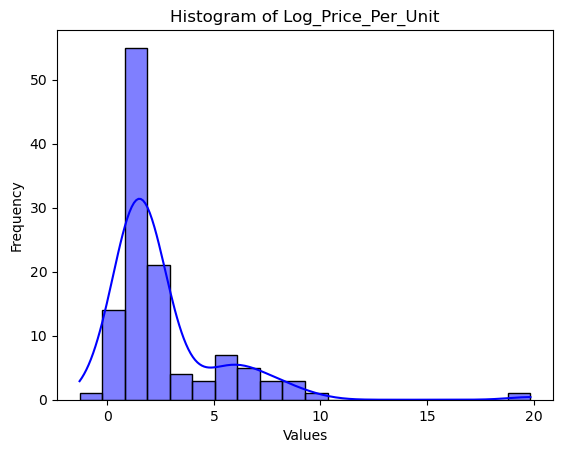

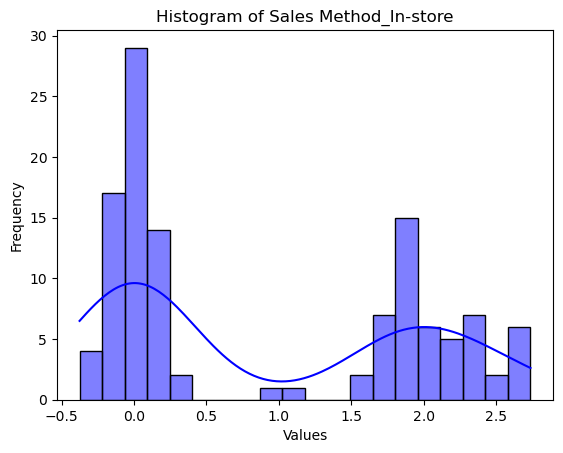

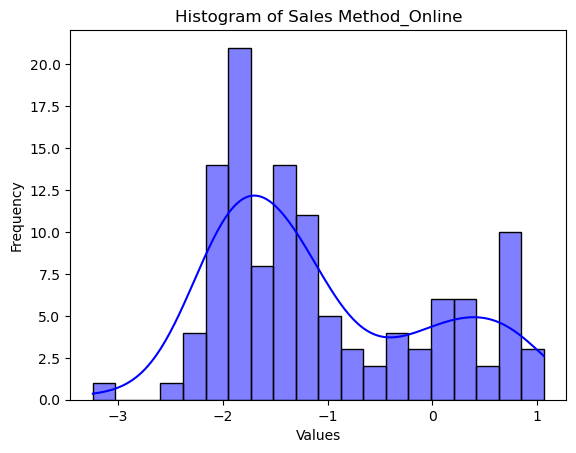

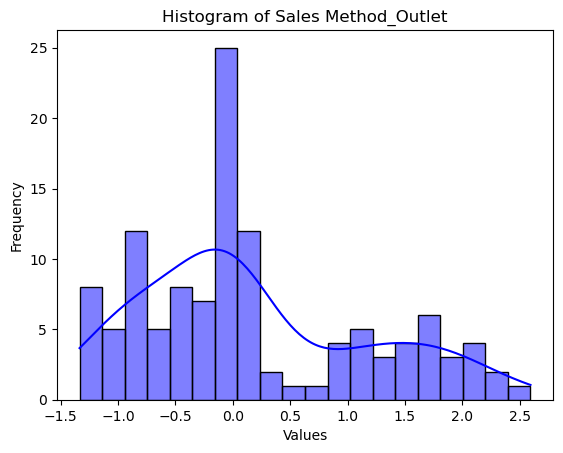

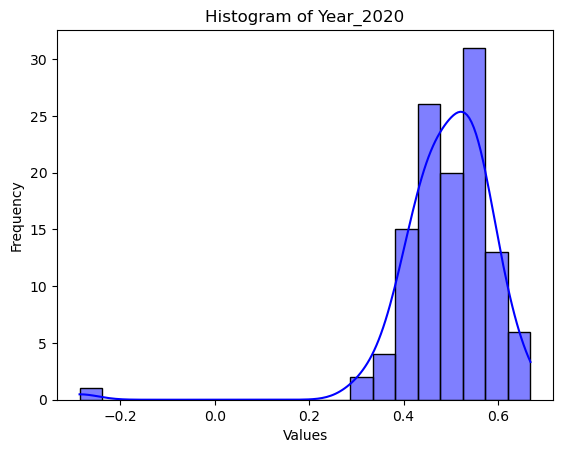

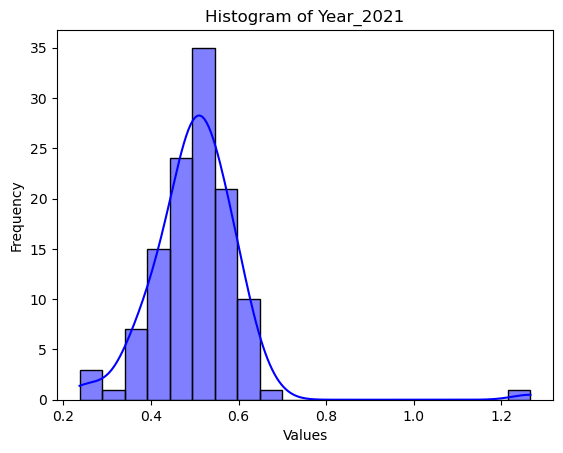

In [53]:
pool_results_normalized_column_list = [x for x in df_semi_pool_results.columns if '_normalized' not in x]

for column in pool_results_normalized_column_list:
    sns.histplot(df_semi_pool_results[column], bins=20, kde=True, color='blue')

    # Add labels and a title
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + column)

    # Show the histogram
    plt.show()

In [54]:
df_semi_pool_results_exclude_1 = df_semi_pool_results[df_semi_pool_results["Log_Price_Per_Unit"]>15]

In [55]:
df_semi_pool_results = df_semi_pool_results[df_semi_pool_results["Log_Price_Per_Unit"]<=15]
#df_semi_pool_results = df_semi_pool_results[df_semi_pool_results["Sales Method_In-store"]>= -1 * (2.71828 ** 14)]
#df_semi_pool_results = df_semi_pool_results[df_semi_pool_results["Sales Method_In-store"]<=  1 * (2.71828 ** 14)]

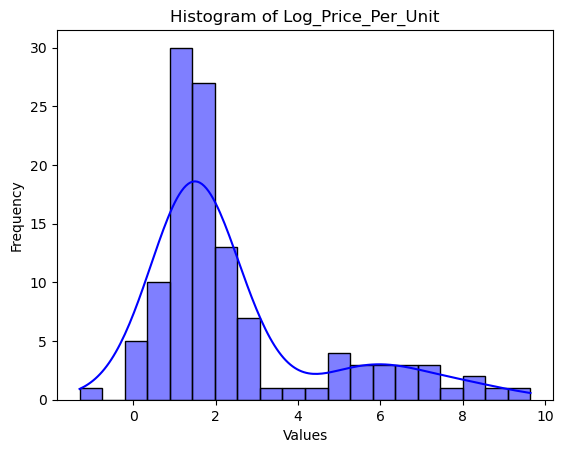

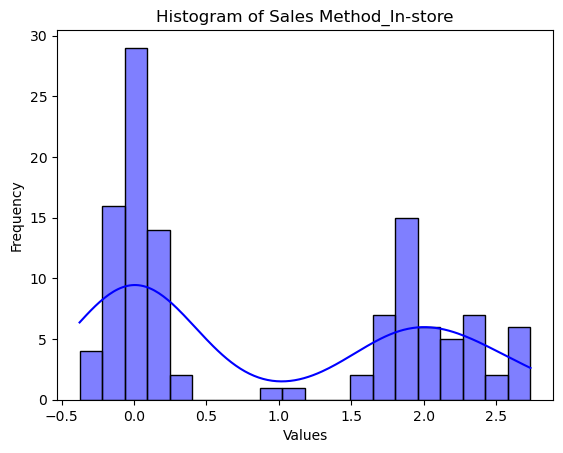

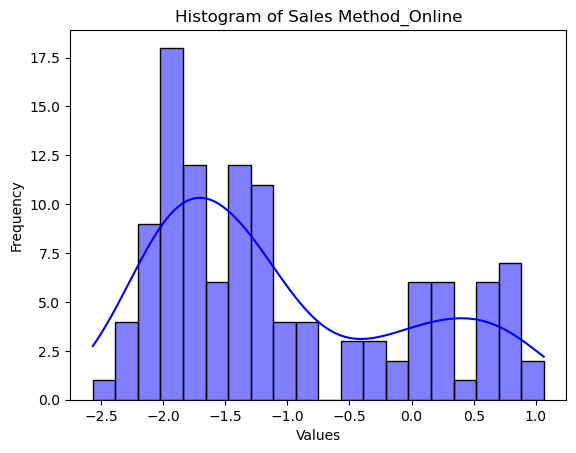

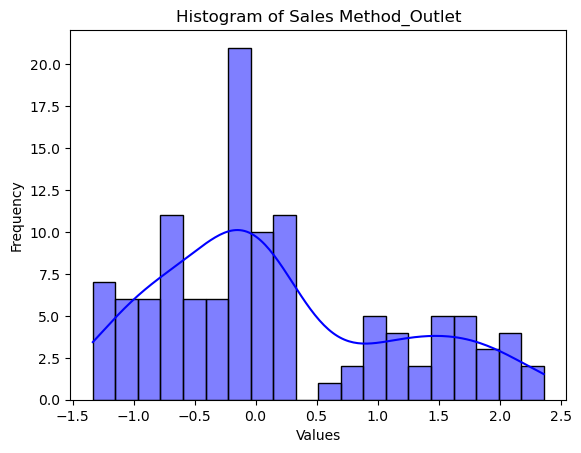

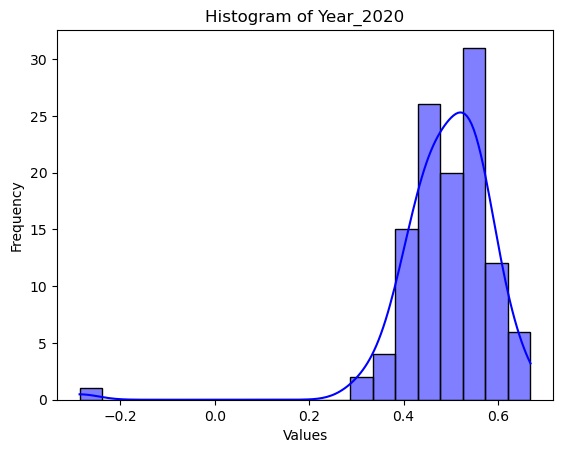

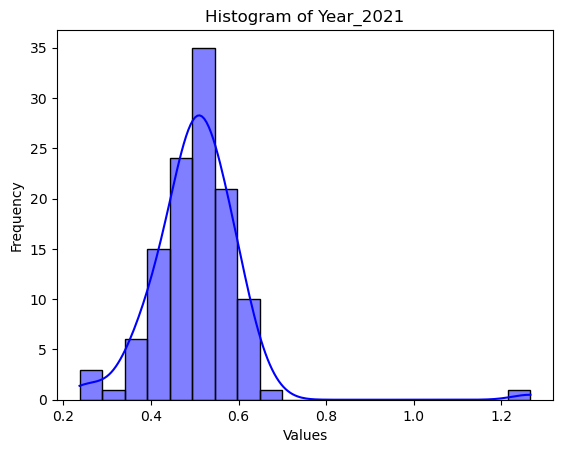

In [56]:
pool_results_normalized_column_list = [x for x in df_semi_pool_results.columns if '_normalized' not in x]

for column in pool_results_normalized_column_list:
    sns.histplot(df_semi_pool_results[column], bins=20, kde=True, color='blue')

    # Add labels and a title
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + column)

    # Show the histogram
    plt.show()

In [57]:
pool_results_non_normalized_column_list = [x for x in df_semi_pool_results.columns if '_normalized' not in x]

for column_name in pool_results_non_normalized_column_list:
    df_semi_pool_results[column_name+'_normalized'] = normalize_column(df_semi_pool_results[column_name])

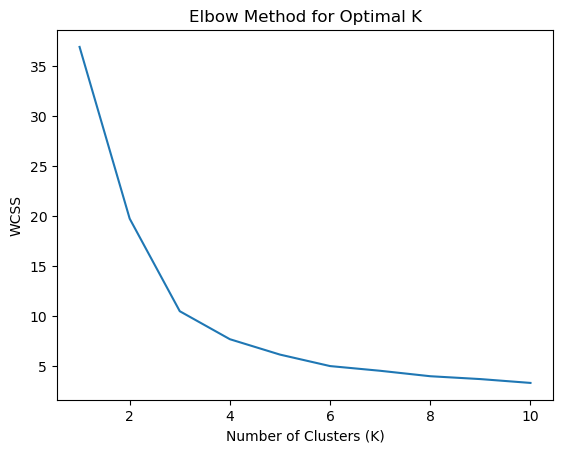

In [58]:
from sklearn.cluster import KMeans

pool_results_normalized_column_list = [x for x in df_semi_pool_results.columns if '_normalized' in x and x!='Log_Price_Year']

data = df_semi_pool_results[pool_results_normalized_column_list].dropna().values
#data = data.reshape(-1, 1)

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()


In [65]:
pool_results_not_normalized_column_list = [x for x in df_semi_pool_results.columns if '_normalized' not in x and x!='Log_Price_Year']

data = df_semi_pool_results[pool_results_not_normalized_column_list].dropna().values

k = 3  # Example: Number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data)

cluster_labels = kmeans.labels_

cluster_centers = kmeans.cluster_centers_

print("Cluster Centers:", cluster_centers)

from collections import Counter
cluster_sizes = dict(Counter(cluster_labels))

Cluster Centers: [[ 1.3258666   1.63124834 -1.77045985  0.15449883  0.49718335  0.50411112]
 [ 6.52982932  0.17858451 -1.15055708  0.8640184   0.47961328  0.50428636]
 [ 1.82618317  0.08001624  0.31699078 -0.34473177  0.49168555  0.5061494 ]]


In [66]:
cluster_centers_reformed = np.empty(cluster_centers.shape)

for i in range(len(cluster_centers)):    
    for j in range(len(cluster_centers[0])):
        column = df_semi_pool_results[pool_results_not_normalized_column_list[j]]
        min_val = column.min()
        max_val = column.max()
        cluster_centers_reformed[i][j] = cluster_centers[i][j] * (max_val - min_val) + min_val

cluster_centers_reformed_df = pd.DataFrame(cluster_centers_reformed)
cluster_centers_reformed_df.columns=pool_results_not_normalized_column_list
cluster_centers_reformed_df["cluster_size"] = cluster_sizes

cluster_centers_reformed_df.head()

,Log_Price_Per_Unit,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,Year_2020,Year_2021,cluster_size
0,13.214535,4.703280,-8.987372,-0.764021,0.188542,0.755962,61
1,70.187113,0.180248,-6.738595,1.859120,0.171760,0.756142,22
2,18.691962,-0.126656,-1.414878,-2.609709,0.183291,0.758060,34


In [67]:
arr_unique_index = df_sales_cleansed["Retailer_ID_City"].unique()

indices_to_exclude = df_semi_pool_results_exclude_1.index

# Create a boolean mask to identify elements to exclude
mask = np.ones_like(arr_unique_index, dtype=bool)
mask[indices_to_exclude] = False

# Get the elements except the ones with specified indices
elements_except_excluded = arr_unique_index[mask]

In [70]:
df_semi_pool_results_analysis = df_semi_pool_results.__deepcopy__()

df_semi_pool_results_analysis["Retailer_ID_City"]=elements_except_excluded
df_semi_pool_results_analysis["Cluster"]=cluster_labels

df_semi_pool_results_analysis.head(10)

,Log_Price_Per_Unit,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,Year_2020,Year_2021,Log_Price_Per_Unit_normalized,Sales Method_In-store_normalized,Sales Method_Online_normalized,Sales Method_Outlet_normalized,Year_2020_normalized,Year_2021_normalized,Retailer_ID_City,Cluster
0,1.865741,-0.140824,-2.122592,1.631256,0.536826,0.467329,0.289250,0.075466,0.121901,0.802385,0.536826,0.223732,Amazon |-| 1185732 |-| Anchorage,0
1,8.730875,-0.044216,-1.353237,1.089259,0.434526,0.266856,0.916322,0.106493,0.333983,0.655783,0.434526,0.028992,Amazon |-| 1185732 |-| Birmingham,1
2,1.264076,2.687344,-1.228530,-0.998802,0.393899,0.475818,0.234293,0.983789,0.368360,0.090994,0.393899,0.231978,Amazon |-| 1185732 |-| Boston,0
3,1.698737,2.404063,-1.422034,-1.019892,0.541461,0.516641,0.273996,0.892808,0.315018,0.085290,0.541461,0.271634,Amazon |-| 1185732 |-| Burlington,0
4,1.886538,-0.221624,0.286049,-0.136204,0.354099,0.519577,0.291150,0.049515,0.785872,0.324314,0.354099,0.274486,Amazon |-| 1185732 |-| Charlotte,2
5,1.668581,0.151373,-0.076427,-0.120712,0.450410,0.484102,0.271241,0.169311,0.685951,0.328504,0.450410,0.240026,Amazon |-| 1185732 |-| Columbus,2
6,4.501843,0.162405,-0.010494,0.320977,0.623131,0.397313,0.530036,0.172854,0.704127,0.447974,0.623131,0.155718,Amazon |-| 1185732 |-| Louisville,1
7,5.140450,1.873141,-1.789979,0.007083,0.527421,0.556529,0.588367,0.722292,0.213590,0.363071,0.527421,0.310381,Amazon |-| 1185732 |-| Manchester,1
8,1.630535,0.090099,-2.146835,1.898246,0.585671,0.372065,0.267766,0.149632,0.115218,0.874601,0.585671,0.131192,Amazon |-| 1185732 |-| Portland,0
9,0.191243,-0.031710,-2.086322,1.774008,0.511072,0.528702,0.136299,0.110510,0.131899,0.840997,0.511072,0.283350,Foot Locker |-| 1128299 |-| Anchorage,0


In [63]:
df = pred_template.copy()
df["Sales_pred"] = samples_predictive["obs"].T.mean(axis=1)
df["sigma"] = samples_predictive["obs"].T.std(axis=1)
df["Sales_inf"] = df["Sales_pred"] - df["sigma"]
df["Sales_sup"] = df["Sales_pred"] + df["sigma"]
df = pd.merge(
    df, df_sales_analysis[["Retailer_ID_City", "Log_Price_Per_Unit", "Log_Sales"]], how="left", on=["Retailer_ID_City", "Log_Price_Per_Unit"]
)
df = df.rename(columns={"Log_Sales": "Sales_true"})
df.head()

,Retailer_ID_City,retailer_city_code,Log_Price_Per_Unit,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,Year_2020,Year_2021,Sales_pred,sigma,Sales_inf,Sales_sup,Sales_true
0,Amazon |-| 1185732 |-| Anchorage,0,3.713572,0,1,0,0,1,7.960520,1.228702,6.731818,9.189222,7.947679
1,Amazon |-| 1185732 |-| Anchorage,0,3.761200,0,1,0,0,1,8.054554,1.237563,6.816990,9.292117,8.105006
2,Amazon |-| 1185732 |-| Anchorage,0,3.784190,0,1,0,0,1,8.066881,1.208672,6.858210,9.275553,7.895063
3,Amazon |-| 1185732 |-| Anchorage,0,3.850148,0,1,0,0,1,8.214070,1.172312,7.041759,9.386382,7.634337
4,Amazon |-| 1185732 |-| Anchorage,0,3.891820,0,1,0,0,1,8.281585,1.194333,7.087252,9.475918,7.720462


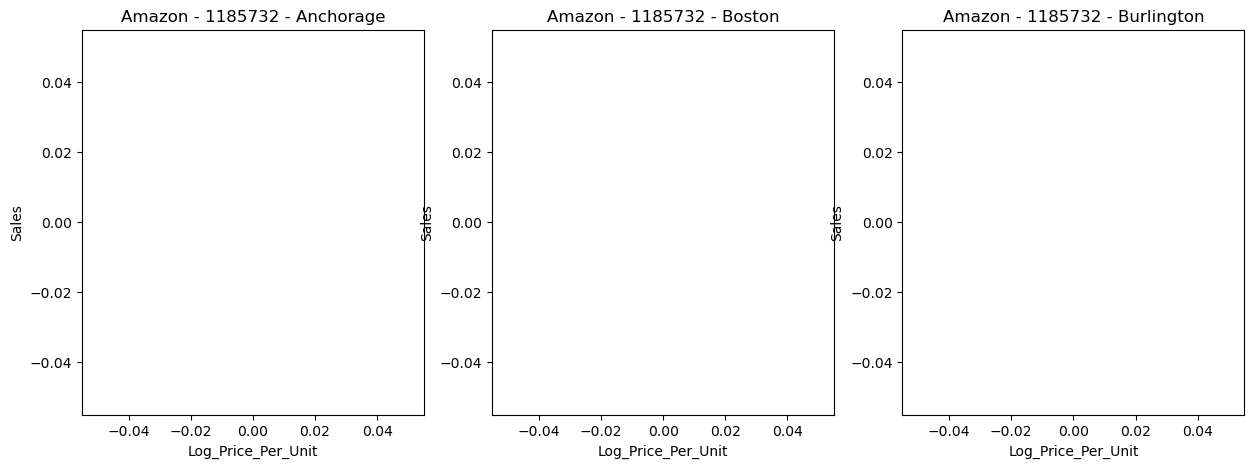

In [64]:
def chart_retailer_with_predictions(retailer_id, ax):
    data = df[df["Retailer_ID_City"] == retailer_id]
    x = data["Log_Price_Per_Unit"]
    ax.set_title(retailer_id)
    ax.plot(x, data["Sales_true"], "o")
    ax.plot(x, data["Sales_pred"])
    ax = sns.regplot(x=x, y=data["Sales_true"], ax=ax, ci=None, line_kws={"color": "red"})
    ax.fill_between(x, data["Sales_inf"], data["Sales_sup"], alpha=0.5, color="#ffcd3c")
    ax.set_ylabel("Sales")


f, axes = plt.subplots(1, 3, figsize=(15, 5))
chart_retailer_with_predictions("Amazon - 1185732 - Anchorage", axes[0])
chart_retailer_with_predictions("Amazon - 1185732 - Boston", axes[1])
chart_retailer_with_predictions("Amazon - 1185732 - Burlington", axes[2])